In [50]:
from util.experiment_setup import load_model, load_dataset, setup_dataset_transforms
from util.files import find_files_in_folder
from util.training import validate
from torch.utils.data import DataLoader
import torch
from tqdm import tqdm
from matplotlib import pyplot as plt
import numpy as np
import os.path as osp

In [51]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using", device)

Using cuda


In [52]:
files_ = find_files_in_folder("../models/bg_transform/", ".cfg")

In [53]:
files_=np.array(files_)[np.array(["no_scale" not in f for f in files_])]

In [54]:
model_paths = [f[:-4] for f in files_]

In [55]:
test_scales = [0.1,0.2,0.3,0.4,0.5,0.65,0.8,0.9,1,1.1,1.2,1.5,2,2.5,3,3.5,3.7]
accuracies = []
test_data = load_dataset(train_data=False, test_data=True, enable_img_transforms=True, min_resize=test_scales[0], max_resize=test_scales[0])
for model_path in model_paths:
    model = load_model(model_path)
    model.to(device)
    model_accs = []
    for scale in tqdm(test_scales):
        transforms = setup_dataset_transforms(enable_img_transforms=True, min_resize=scale, max_resize=scale)
        test_data.transform = transforms
        test_loader = DataLoader(test_data, batch_size=512, shuffle=False)
        model_accs.append(validate(model, test_loader, device, abort_batch=1))
    accuracies.append(model_accs)

Files already downloaded and verified


2it [00:00,  2.08it/s][00:00<?, ?it/s]
2it [00:00,  2.09it/s][00:00<00:15,  1.04it/s]
2it [00:00,  2.10it/s][00:01<00:14,  1.04it/s]
2it [00:01,  1.91it/s][00:02<00:13,  1.04it/s]
2it [00:00,  2.25it/s][00:03<00:12,  1.00it/s]
2it [00:00,  2.16it/s][00:04<00:11,  1.04it/s]
2it [00:00,  2.29it/s][00:05<00:10,  1.05it/s]
2it [00:00,  2.22it/s][00:06<00:09,  1.08it/s]
2it [00:00,  2.42it/s][00:07<00:08,  1.09it/s]
2it [00:00,  2.21it/s][00:08<00:07,  1.12it/s]
2it [00:00,  2.14it/s] [00:09<00:06,  1.11it/s]
2it [00:01,  1.69it/s] [00:10<00:05,  1.10it/s]
2it [00:01,  1.74it/s] [00:11<00:04,  1.00it/s]
2it [00:01,  1.82it/s] [00:12<00:04,  1.04s/it]
2it [00:01,  1.64it/s] [00:13<00:03,  1.06s/it]
2it [00:01,  1.27it/s] [00:14<00:02,  1.11s/it]
2it [00:01,  1.67it/s] [00:16<00:01,  1.25s/it]
100%|██████████| 17/17 [00:17<00:00,  1.04s/it]
2it [00:00,  2.31it/s][00:00<?, ?it/s]
2it [00:01,  1.78it/s][00:00<00:13,  1.15it/s]
2it [00:00,  2.28it/s][00:02<00:15,  1.02s/it]
2it [00:00,  2.17it/s

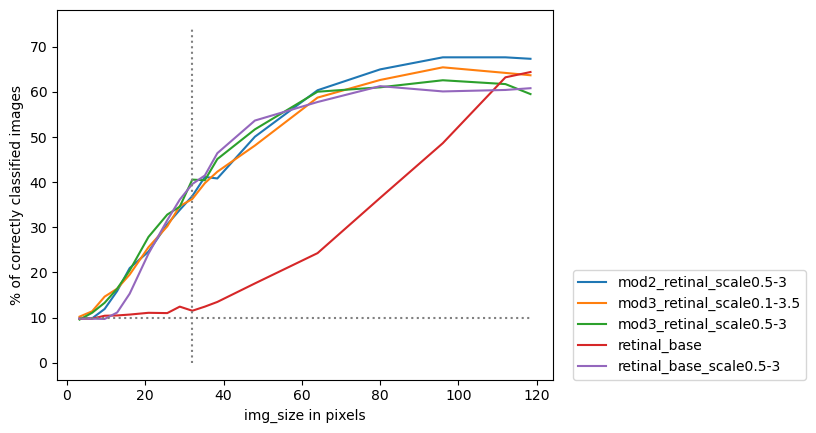

In [ ]:
x = np.array(test_scales)
y = np.array(accuracies).T
plt.plot(x, y)
plt.vlines(1, 0, y.max()*1.1, colors="grey", linestyles="dotted", label="orig size")
plt.hlines(10, x.min(), x.max(), colors="grey", linestyles="dotted")
plt.legend([osp.split(model_path)[1] for model_path in model_paths], loc=(1.04, 0))
plt.ylabel("% of correctly classified images")
plt.xlabel("scale_factor (orig_size 32px)")
plt.show()